""" In this dataset, we will look at the recipe of muffin and
cupcake. We will use the Support Vector Machine (SVM) to detect 
what we would be making; either a cupcake or muffin"""

In [1]:
# First, we are going to load our packages for this coding
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm

In [2]:
# Let us not forget to load our visualization for the data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Then we can load the data, but be careful not to load the path I am using since you will have to change it because you have a different computer than mine
cupmuf = pd.read_excel('C:/Users/Delmafia91/Downloads/RecipesMuffinsCupcakes.xlsx')

In [4]:
# Now that we have everything we need, we can take a peek at the data
cupmuf.head(5)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [1]:
# Notice that these are numeric. I am sure we could guess what those numbers mean. I think the "Flour" means ounces, "Milk" liters and etc... These are the ingredients needed for the recipe

In [ ]:
# We also need to plot the data so we can see how these variables look like.
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [6]:
# Format or pre-process  data
type_label = np.where(cupmuf['Type']=='Muffin', 0, 1)
cupmuf_feat = cupmuf.columns.values[1:].tolist()
cupmuf_feat

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [7]:
# Looking at all ingredients
ingr = cupmuf[cupmuf_feat].values
ingr

array([[55, 28,  3,  7,  5,  2,  0,  0],
       [47, 24, 12,  6,  9,  1,  0,  0],
       [47, 23, 18,  6,  4,  1,  0,  0],
       [45, 11, 17, 17,  8,  1,  0,  0],
       [50, 25, 12,  6,  5,  2,  1,  0],
       [55, 27,  3,  7,  5,  2,  1,  0],
       [54, 27,  7,  5,  5,  2,  0,  0],
       [47, 26, 10, 10,  4,  1,  0,  0],
       [50, 17, 17,  8,  6,  1,  0,  0],
       [50, 17, 17, 11,  4,  1,  0,  0],
       [39,  0, 26, 19, 14,  1,  1,  0],
       [42, 21, 16, 10,  8,  3,  0,  0],
       [34, 17, 20, 20,  5,  2,  1,  0],
       [39, 13, 17, 19, 10,  1,  1,  0],
       [38, 15, 23, 15,  8,  0,  1,  0],
       [42, 18, 25,  9,  5,  1,  0,  0],
       [36, 14, 21, 14, 11,  2,  1,  0],
       [38, 15, 31,  8,  6,  1,  1,  0],
       [36, 16, 24, 12,  9,  1,  1,  0],
       [34, 17, 23, 11, 13,  0,  1,  0]], dtype=int64)

In [8]:
# looking for specific ingredient
ingredients = cupmuf[['Flour', 'Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [9]:
# We want to fit our model
cupmufel = svm.SVC(kernel='linear')
cupmufel.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
# Get the separating hyperplane
cm = cupmufel.coef_[0]
a = -cm[0] / cm[1]
xx = np.linspace(30, 60)
yy = a * xx - (cupmufel.intercept_[0]) / cm[1]

# plot the parallels to the separating hyperplane
cc = cupmufel.support_vectors_[0]
yy_down = a * xx + (cc[1] - a * cc[0])
mm = cupmufel.support_vectors_[-1]
yy_up = a * xx + (mm[1] - a * mm[0])

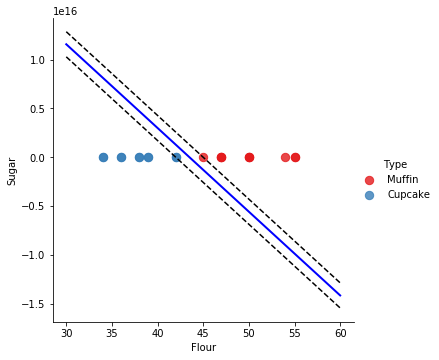

In [27]:
# plot new graph
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [28]:
# This is where we will want to create a function to predict muffin or cupcake. The reason for it is that you do not want to keep on writing the same thing all the time. That would be tiring
def Cupcake_or_Muffin(flour, sugar):
    if(cupmufel.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe')
    else:
        print('You\'re looking at a cupcake recipe')

In [29]:
# predict if 50 parts flour and 20 parts sugar
Cupcake_or_Muffin(50, 20)

You're looking at a muffin recipe


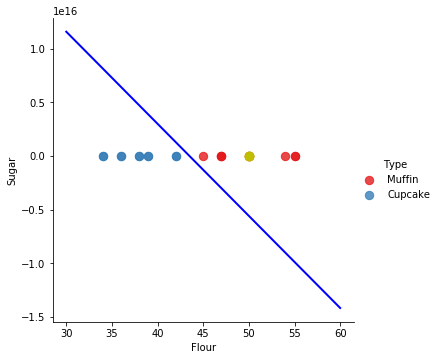

In [32]:
# plot prediction on the graph
sns.lmplot('Flour', 'Sugar', data = cupmuf, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue')
plt.plot(50, 20, 'yo', markersize='9')